In [1]:
%load_ext lab_black

In [2]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.special as sp
import theano

from scipy import stats
from theano import tensor as tt

%config InlineBackend.figure_format = 'retina'
warnings.simplefilter(action="ignore", category=(FutureWarning, UserWarning))
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
az.style.use("arviz-darkgrid")

# Chapter 14 - Multinomial processing trees

## 14.1 Multinomial processing model of pair-clustering
Multinomial processing trees (MPTs: Batchelder & Riefer, 1980, 1986; Chechile, 1973; Chechile & Meyer, 1976) provide one approach to modeling the finding that semantically related items are often recalled consecutively. An MPT model assumes that observed behavior arises from a sequence of cognitive events, able to be represented by a rooted tree architecture

$$ c,r,u \sim \text{Beta}(1,1)  $$
$$ \theta_{1} = cr $$
$$ \theta_{2} = (1\,-\,c)u^2 $$
$$ \theta_{3} = 2u\,(1\,-\,c)\,(1\,-\,u) $$
$$ \theta_{4} = c\,(1\,-\,r)\,+\,(1\,-\,c)\,(1\,-\,u)^2 $$
$$ \mathbf k \sim \text{Multinomial}(\mathbf \theta,n)$$

In [4]:
indiv_trial = []
Nt = 3
kall = np.array([[45, 24, 97, 254], [106, 41, 107, 166], [243, 64, 65, 48]])

kshared = theano.shared(kall[0, :])

In [5]:
with pm.Model() as model1:
    c = pm.Beta("c", alpha=1, beta=1)
    r = pm.Beta("r", alpha=1, beta=1)
    u = pm.Beta("u", alpha=1, beta=1)

    t1 = c * r
    t2 = (1 - c) * (u ** 2)
    t3 = 2 * u * (1 - c) * (1 - u)
    t4 = c * (1 - r) + (1 - c) * (1 - u) ** 2

    kobs = pm.Multinomial("kobs", p=[t1, t2, t3, t4], n=kshared.sum(), observed=kshared)

In [6]:
with model1:
    indiv_trial.append(pm.sample())

kshared.set_value(kall[1, :])
with model1:
    indiv_trial.append(pm.sample(tune=2000))

kshared.set_value(kall[2, :])
with model1:
    indiv_trial.append(pm.sample())

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [u, r, c]


/opt/anaconda3/lib/python3.8/site-packages/theano/scalar/basic.py:2851: RuntimeWarning: divide by zero encountered in true_divide
  return np.float32(1.0) / x
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/lib/python3.8/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: invalid value encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/opt/anaconda3/lib/python3.8/site-packages/theano/scalar/basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/opt/anaconda3/lib/python3.8/site-packages/theano/scalar/basic.py:1955: RuntimeWarning: divide by zero encountered in true_divide
  return x / y


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 480 seconds.
The acceptance probability does not match the target. It is 0.6300316808637796, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [u, r, c]


/opt/anaconda3/lib/python3.8/site-packages/theano/scalar/basic.py:2851: RuntimeWarning: divide by zero encountered in true_divide
  return np.float32(1.0) / x
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/lib/python3.8/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: invalid value encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/opt/anaconda3/lib/python3.8/site-packages/theano/scalar/basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/opt/anaconda3/lib/python3.8/site-packages/theano/scalar/basic.py:1955: RuntimeWarning: divide by zero encountered in true_divide
  return x / y


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 726 seconds.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [u, r, c]


/opt/anaconda3/lib/python3.8/site-packages/theano/scalar/basic.py:2851: RuntimeWarning: divide by zero encountered in true_divide
  return np.float32(1.0) / x
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/lib/python3.8/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: invalid value encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/opt/anaconda3/lib/python3.8/site-packages/theano/scalar/basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/opt/anaconda3/lib/python3.8/site-packages/theano/scalar/basic.py:1955: RuntimeWarning: divide by zero encountered in true_divide
  return x / y
/opt/anaconda3/lib/python3.8/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: divide by zero encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 450 seconds.


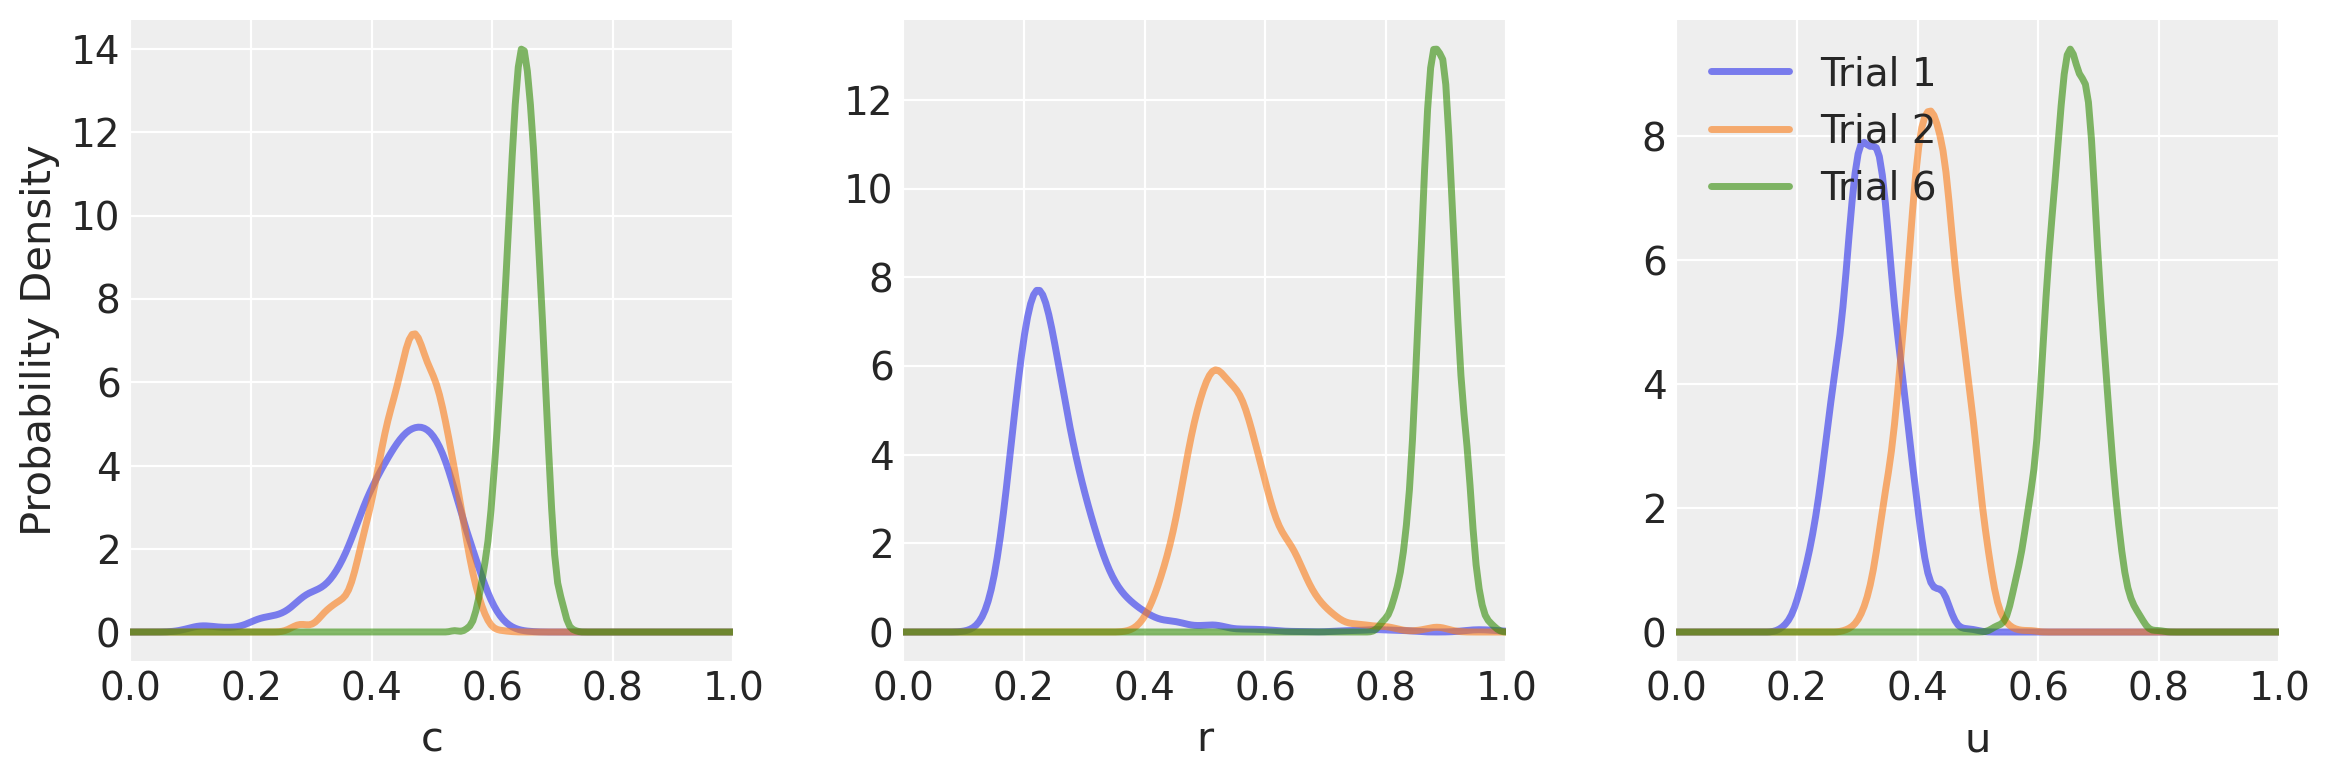

In [7]:
_, axes = plt.subplots(1, 3, figsize=(12, 4))

x1 = np.linspace(0, 1, 200)
plotparm = ["c", "r", "u"]
trialname = ["Trial 1", "Trial 2", "Trial 6"]

for trial in np.arange(Nt):
    for ip, ii in enumerate(plotparm):
        cpost = indiv_trial[trial][ii]
        my_pdf = stats.kde.gaussian_kde(cpost)
        # distribution function
        axes[ip].plot(x1, my_pdf(x1), lw=2.5, alpha=0.6)
        axes[ip].set_xlim([0, 1])
        axes[ip].set_xlabel(ii)

axes[0].set_ylabel("Probability Density")
plt.legend(trialname, loc="upper left")
plt.tight_layout()

## 14.2 Latent-trait MPT model

$$ \hat \mu^c, \hat \mu^r, \hat \mu^u \sim \text{Gaussian}(0,1)$$
$$ \hat \xi^c, \hat \xi^r, \hat \xi^u \sim \text{Uniform}(0,100)$$
$$ \Sigma^{-1} \sim \text{Wishart}(I,4)$$
$$ (\hat \delta_{i}^c,\hat \delta_{i}^r,\hat \delta_{i}^u) \sim \text{MvGaussian}(0,\Sigma^{-1})$$
$$ c_{i} = \Phi(\hat \mu^c\,+\,\hat \xi^c\hat \delta_{i}^c)$$
$$ r_{i} = \Phi(\hat \mu^r\,+\,\hat \xi^r\hat \delta_{i}^r)$$
$$ u_{i} = \Phi(\hat \mu^u\,+\,\hat \xi^u\hat \delta_{i}^u)$$
$$ \theta_{i1} = c_i r_i $$
$$ \theta_{i2} = (1\,-\,c_i)u_i^2 $$
$$ \theta_{i3} = 2u_i\,(1\,-\,c_i)\,(1\,-\,u_i) $$
$$ \theta_{i4} = c_i\,(1\,-\,r_i)\,+\,(1\,-\,c_i)\,(1\,-\,u_i)^2 $$
$$ \mathbf k_i \sim \text{Multinomial}(\mathbf \theta_i,n)$$

In [8]:
### Riefer et al (2002) data:
Nsubj = 21
Nitem = 20

response_1 = np.array(
    [
        2,
        4,
        4,
        10,
        2,
        1,
        3,
        14,
        2,
        2,
        5,
        11,
        6,
        0,
        4,
        10,
        1,
        0,
        4,
        15,
        1,
        0,
        2,
        17,
        1,
        2,
        4,
        13,
        4,
        1,
        6,
        9,
        5,
        1,
        4,
        10,
        1,
        0,
        9,
        10,
        5,
        0,
        3,
        12,
        0,
        1,
        6,
        13,
        1,
        5,
        7,
        7,
        1,
        1,
        4,
        14,
        2,
        2,
        3,
        13,
        2,
        1,
        5,
        12,
        2,
        0,
        6,
        12,
        1,
        0,
        5,
        14,
        2,
        1,
        8,
        9,
        3,
        0,
        2,
        15,
        1,
        2,
        3,
        14,
    ]
).reshape(21, -1)
response_2 = np.array(
    [
        7,
        5,
        3,
        5,
        5,
        2,
        3,
        10,
        6,
        2,
        7,
        5,
        9,
        4,
        2,
        5,
        2,
        2,
        7,
        9,
        1,
        3,
        3,
        13,
        5,
        0,
        5,
        10,
        7,
        3,
        4,
        6,
        7,
        3,
        6,
        4,
        4,
        1,
        10,
        5,
        9,
        1,
        2,
        8,
        3,
        1,
        6,
        10,
        3,
        5,
        9,
        3,
        2,
        0,
        6,
        12,
        8,
        0,
        3,
        9,
        3,
        2,
        7,
        8,
        7,
        1,
        5,
        7,
        2,
        1,
        6,
        11,
        5,
        3,
        5,
        7,
        5,
        0,
        6,
        9,
        6,
        2,
        2,
        10,
    ]
).reshape(21, -1)
response_6 = np.array(
    [
        14,
        3,
        1,
        2,
        12,
        3,
        1,
        4,
        18,
        0,
        1,
        1,
        15,
        3,
        0,
        2,
        7,
        1,
        10,
        2,
        3,
        6,
        11,
        0,
        8,
        4,
        3,
        5,
        17,
        1,
        1,
        1,
        13,
        4,
        3,
        0,
        11,
        6,
        1,
        2,
        16,
        1,
        2,
        1,
        10,
        1,
        3,
        6,
        7,
        13,
        0,
        0,
        8,
        4,
        3,
        5,
        16,
        1,
        1,
        2,
        5,
        4,
        7,
        4,
        15,
        0,
        5,
        0,
        6,
        3,
        6,
        5,
        17,
        2,
        0,
        1,
        17,
        1,
        0,
        2,
        8,
        3,
        6,
        3,
    ]
).reshape(21, -1)

kall = [response_1, response_2, response_6]

In [9]:
p = 3
nu = p + 2
Nt = 3


def Phi(x):
    # probit transform
    return 0.5 + 0.5 * pm.math.erf(x / pm.math.sqrt(2))


kshared = theano.shared(kall[0])

In [10]:
with pm.Model() as model2:
    mu = pm.Normal("mu", mu=0, sd=1, shape=p)
    xi = pm.Uniform("xi", lower=0, upper=100, shape=p)

    wishart = pm.WishartBartlett("wishart", S=np.eye(p), nu=nu)
    cov = tt.nlinalg.matrix_inverse(wishart)

    delta = pm.MvNormal("delta", mu=np.zeros(Nt), cov=cov, shape=(Nsubj, p))

    c = Phi(mu[0] + xi[0] * delta[:, 0])
    r = Phi(mu[1] + xi[1] * delta[:, 1])
    u = Phi(mu[2] + xi[2] * delta[:, 2])

    t1 = c * r
    t2 = (1 - c) * (u ** 2)
    t3 = 2 * u * (1 - c) * (1 - u)
    t4 = c * (1 - r) + (1 - c) * (1 - u) ** 2

    muc = pm.Deterministic("muc", Phi(mu[0]))
    mur = pm.Deterministic("mur", Phi(mu[1]))
    muu = pm.Deterministic("muu", Phi(mu[2]))

    p_ = tt.stack([t1, t2, t3, t4])
    # Multinomial data likelihood
    kobs = pm.Multinomial("kobs", p=p_.T, n=Nitem, observed=kshared)

Added new variable wishart_c to model diagonal of Wishart.
Added new variable wishart_z to model off-diagonals of Wishart.


In [ ]:
indiv_trial2 = []

with model2:
    indiv_trial2.append(
        pm.sample(2000, tune=2000, init="adapt_diag", target_accept=0.95)
    )

kshared.set_value(kall[1])
with model2:
    indiv_trial2.append(
        pm.sample(2000, tune=2000, init="adapt_diag", target_accept=0.95)
    )

kshared.set_value(kall[2])
with model2:
    indiv_trial2.append(
        pm.sample(2000, tune=2000, init="adapt_diag", target_accept=0.95)
    )

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
/opt/anaconda3/lib/python3.8/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
/opt/anaconda3/lib/python3.8/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Sequential sampling (2 chains in 1 job)
NUTS: [delta, wishart_z, wishart_c, xi, mu]


/opt/anaconda3/lib/python3.8/site-packages/theano/scalar/basic.py:1955: RuntimeWarning: divide by zero encountered in true_divide
  return x / y
/opt/anaconda3/lib/python3.8/site-packages/theano/scalar/basic.py:1955: RuntimeWarning: invalid value encountered in true_divide
  return x / y
/opt/anaconda3/lib/python3.8/site-packages/theano/scalar/basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
for trial in np.arange(Nt):
    az.plot_trace(indiv_trial2[trial], var_names=["mu"], compact=True);

In [ ]:
def npPhi(x):
    # probit transform
    return (1.0 + sp.erf(x / np.sqrt(2.0))) / 2.0

In [ ]:
_, axes = plt.subplots(1, 3, figsize=(12, 4))
x1 = np.linspace(0, 1, 200)
plotparm = [r"$\mu_c$", r"$\mu_r$", r"$\mu_u$"]
trialname = ["Trial 1", "Trial 2", "Trial 6"]

for trial in np.arange(Nt):
    mupost = indiv_trial2[trial]["mu"]

    for ip, ii in enumerate(plotparm):
        cpost = npPhi(mupost[:, ip])
        my_pdf = stats.kde.gaussian_kde(cpost)
        # distribution function
        axes[ip].plot(x1, my_pdf(x1), lw=2.5, alpha=0.6)
        axes[ip].set_xlim([0, 1])
        axes[ip].set_xlabel(ii, fontsize=15)

axes[0].set_ylabel("Probability Density")
plt.legend(trialname)
plt.tight_layout();

In [ ]:
_, axes = plt.subplots(1, 3, figsize=(12, 4))
x1 = np.linspace(-1, 1, 200)
plotparm2 = [r"$\rho_{cr}$", r"$\rho_{cu}$", r"$\rho_{ru}$"]

for trial in np.arange(Nt):
    sigmainvpost = indiv_trial2[trial]["wishart"]
    tmpn = sigmainvpost.shape[0]
    sigmapost = np.ndarray((tmpn, 3, 3), dtype=float)
    for i in range(tmpn):
        sigmapost[i, :, :] = np.linalg.inv(sigmainvpost[i, :, :])

    cpost0 = sigmapost[:, 0, 1] / np.sqrt(sigmapost[:, 0, 0] * sigmapost[:, 1, 1])
    my_pdf = stats.kde.gaussian_kde(cpost0)
    axes[0].plot(x1, my_pdf(x1), lw=2.5, alpha=0.6)  # distribution function

    cpost1 = sigmapost[:, 0, 2] / np.sqrt(sigmapost[:, 0, 0] * sigmapost[:, 2, 2])
    my_pdf = stats.kde.gaussian_kde(cpost1)
    axes[1].plot(x1, my_pdf(x1), lw=2.5, alpha=0.6)  # distribution function

    cpost2 = sigmapost[:, 1, 2] / np.sqrt(sigmapost[:, 1, 1] * sigmapost[:, 2, 2])
    my_pdf = stats.kde.gaussian_kde(cpost0)
    axes[2].plot(x1, my_pdf(x1), lw=2.5, alpha=0.6)  # distribution function

axes[0].set_ylabel("Probability Density")
axes[0].set_xlim([-1, 1])
axes[0].set_xlabel(plotparm2[0], fontsize=15)
axes[1].set_xlim([-1, 1])
axes[1].set_xlabel(plotparm2[1], fontsize=15)
axes[2].set_xlim([-1, 1])
axes[2].set_xlabel(plotparm2[2], fontsize=15)
plt.legend(trialname)
plt.tight_layout();

The above model works fine, but using Wishart is highly discouraged, including the Wishart-Bartlett form. Below we reparameterized the model using a LKJ distribution (Cholesky decomposed version) as prior for covariance matrix.

In [ ]:
with pm.Model() as modelk:
    mu = pm.Normal("mu", mu=0.0, sd=1.0, shape=Nt)
    xi = pm.HalfNormal("xi", sd=1.0, shape=Nt)

    sd_dist = pm.Exponential.dist(1.0)
    packed_chol = pm.LKJCholeskyCov("chol_cov", n=Nt, eta=4, sd_dist=sd_dist)
    # compute the covariance matrix
    chol = pm.expand_packed_triangular(Nt, packed_chol, lower=True)

    vals_raw = pm.Normal("vals_raw", mu=0.0, sd=1.0, shape=(Nt, Nsubj))
    delta = tt.dot(chol, vals_raw).T

    c = Phi(mu[0] + xi[0] * delta[:, 0])
    r = Phi(mu[1] + xi[1] * delta[:, 1])
    u = Phi(mu[2] + xi[2] * delta[:, 2])

    t1 = c * r
    t2 = (1 - c) * (u ** 2)
    t3 = 2 * u * (1 - c) * (1 - u)
    t4 = c * (1 - r) + (1 - c) * (1 - u) ** 2

    muc = pm.Deterministic("muc", Phi(mu[0]))
    mur = pm.Deterministic("mur", Phi(mu[1]))
    muu = pm.Deterministic("muu", Phi(mu[2]))

    p_ = tt.stack([t1, t2, t3, t4])
    kobs = pm.Multinomial("kobs", p=p_.T, n=Nitem, observed=kall[2])
    trace = pm.sample(2000, tune=3000, init="adapt_diag", target_accept=0.95)

az.plot_trace(trace, var_names=["mu", "xi"], compact=True);

Compare with the result using wishart prior

In [ ]:
az.plot_trace(indiv_trial2[2], var_names=["mu", "xi"], compact=True);

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w